/tmp/ipykernel_48056/3967480904.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)


Lineáris szakasz: 17–40
Meredekség (modulusz): 123.72 MPa / %
Ábra elmentve ide: Specimen_RawData_9_linear_fit.png


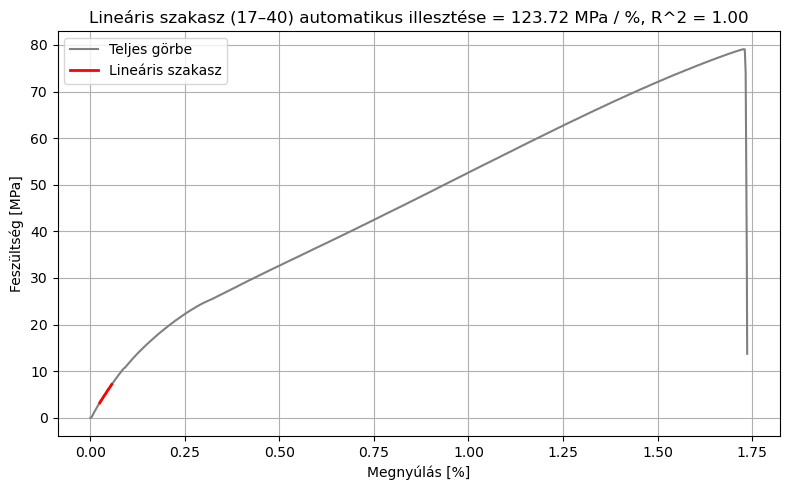

In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# === Beállítások ===
file = "Specimen_RawData_9"
file_path = f"{file}.csv"  # <- cseréld a fájlnevet, ha másik fájlt használsz
encoding = 'latin1'  # vagy próbáld 'cp1250'-vel, ha ez nem működik
sep = ';'

# === 1. Adatok betöltése és tisztítása ===
df = pd.read_csv(file_path, encoding=encoding, sep=sep, skiprows=3)
df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df = df.apply(pd.to_numeric, errors='coerce')
df_clean = df[['(%)', '(MPa)']].dropna()
df_clean.columns = ['strain', 'stress']

# === 2. Lineáris szakasz automatikus keresése ===
def find_linear_region(x, y, window_size=23, r2_threshold=0.85):
    best_start = None
    best_r2 = 0
    best_model = None

    for i in range(len(x) - window_size):
        x_window = x[i:i+window_size].reshape(-1, 1)
        y_window = y[i:i+window_size]

        model = LinearRegression().fit(x_window, y_window)
        r2 = model.score(x_window, y_window)
        slope = model.coef_[0]

        if r2 > r2_threshold and r2 > best_r2 and slope > 0:
            best_r2 = r2
            best_start = i
            best_model = model

    if best_start is not None:
        return best_start, best_start + window_size, best_model
    else:
        return None, None, None

# === 3. Alkalmazás az adatokra ===
x = df_clean['strain'].values
y = df_clean['stress'].values
start_idx, end_idx, model = find_linear_region(x, y)

# === 4. Eredmények kiírása ===
if model:
    slope = model.coef_[0]
    print(f"Lineáris szakasz: {start_idx}–{end_idx}")
    print(f"Meredekség (modulusz): {slope:.2f} MPa / %")

    # === 5. (Opcionális) Grafikon rajzolása ===
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label='Teljes görbe', color='gray')
    plt.plot(x[start_idx:end_idx], y[start_idx:end_idx], label='Lineáris szakasz', color='red', linewidth=2)
    plt.xlabel('Megnyúlás [%]')
    plt.ylabel('Feszültség [MPa]')
    plt.title(f'Lineáris szakasz ({start_idx}–{end_idx}) automatikus illesztése = {slope:.2f} MPa / %, R^2 = {model.score(x[start_idx:end_idx].reshape(-1, 1), y[start_idx:end_idx]):.2f}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # === Mentés ===
    plt.savefig(f"{file}_linear_fit.png", dpi=300)
    print(f"Ábra elmentve ide: {file}_linear_fit.png")
    plt.show()
else:
    print("Nem található megfelelő lineáris szakasz.")



